# Graph Litmus Test

This is a very simple example to proove, that the GCN components are actually working.

In [1]:
from Networkx_Dataset import get_random_graphs, plot_nx_edge_count
from photonai.base import Hyperpipe, PipelineElement
from sklearn.model_selection import KFold
import networkx as nx
import numpy as np

Create a sample dataset:

In [2]:
# create dataset
sparse_graphs = get_random_graphs(500, 20, 0.2)
dense_graphs = get_random_graphs(500, 20, 0.4)
graphs = sparse_graphs + dense_graphs
graphs = np.stack([nx.to_numpy_array(g) for g in graphs])
graphs = np.repeat(graphs[:, :, :, np.newaxis], 2, axis=3)

# create labels
sparse_labels = [0] * 500
dense_labels = [1] * 500
labels = sparse_labels + dense_labels

Visualize the edge count of the graphs (we created two groups):

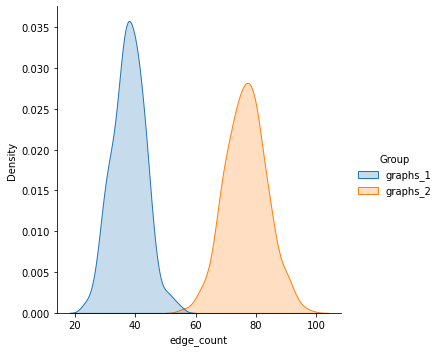

In [3]:
plot_nx_edge_count(sparse_graphs, dense_graphs)

Setup the PHOTONAI Pipeline

In [4]:
my_pipe = Hyperpipe('basic_gcn_pipe',
                    inner_cv=KFold(n_splits=5),
                    outer_cv=KFold(n_splits=5),
                    optimizer='sk_opt',
                    optimizer_params={'n_configurations': 25},
                    metrics=['accuracy', 'balanced_accuracy', 'recall', 'precision'],
                    best_config_metric='accuracy')

my_pipe.add(PipelineElement('GraphConstructorThreshold', threshold=0.95))

my_pipe.add(PipelineElement('GCNClassifier', feature_axis=0))

Using backend: pytorch


Fit the Pipeline to our data:

In [5]:
my_pipe.fit(graphs, labels)

PHOTONAI ANALYSIS: basic_gcn_pipe

*****************************************************************************************************
Outer Cross validation Fold 1
*****************************************************************************************************
Did not find any hyperparameter to convert into skopt space.


/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/photonai/optimization/scikit_optimize/sk_opt.py:169: UserWarning: Did not find any hyperparameter to convert into skopt space.
  warnings.warn(msg)
  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib

-----------------------------------------------------------------------------------------------------
BEST_CONFIG 
-----------------------------------------------------------------------------------------------------
{}
-----------------------------------------------------------------------------------------------------
VALIDATION PERFORMANCE
-----------------------------------------------------------------------------------------------------
+-------------------+-------------------+------------------+
|       METRIC      | PERFORMANCE TRAIN | PERFORMANCE TEST |
+-------------------+-------------------+------------------+
|      accuracy     |       0.9988      |      0.9962      |
| balanced_accuracy |       0.9982      |       nan        |
|       recall      |       0.9988      |      0.7987      |
|     precision     |       0.9992      |      0.8000      |
+-------------------+-------------------+------------------+


  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 200/200 [00:43<00:00,  4.61it/s]
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

-----------------------------------------------------------------------------------------------------
TEST PERFORMANCE
-----------------------------------------------------------------------------------------------------
+-------------------+-------------------+------------------+
|       METRIC      | PERFORMANCE TRAIN | PERFORMANCE TEST |
+-------------------+-------------------+------------------+
|      accuracy     |       0.9988      |      1.0000      |
| balanced_accuracy |       0.9990      |       nan        |
|       recall      |       0.9980      |      0.0000      |
|     precision     |       1.0000      |      0.0000      |
+-------------------+-------------------+------------------+

*****************************************************************************************************
Outer Cross validation Fold 2
*****************************************************************************************************
Did not find any hyperparameter to convert into skopt sp

/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/photonai/optimization/scikit_optimize/sk_opt.py:169: UserWarning: Did not find any hyperparameter to convert into skopt space.
  warnings.warn(msg)
  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metric

-----------------------------------------------------------------------------------------------------
BEST_CONFIG 
-----------------------------------------------------------------------------------------------------
{}
-----------------------------------------------------------------------------------------------------
VALIDATION PERFORMANCE
-----------------------------------------------------------------------------------------------------
+-------------------+-------------------+------------------+
|       METRIC      | PERFORMANCE TRAIN | PERFORMANCE TEST |
+-------------------+-------------------+------------------+
|      accuracy     |       0.9975      |      0.9988      |
| balanced_accuracy |       0.9976      |       nan        |
|       recall      |       0.9986      |      0.7987      |
|     precision     |       0.9971      |      0.8000      |
+-------------------+-------------------+------------------+


  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 200/200 [00:45<00:00,  4.37it/s]
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

-----------------------------------------------------------------------------------------------------
TEST PERFORMANCE
-----------------------------------------------------------------------------------------------------
+-------------------+-------------------+------------------+
|       METRIC      | PERFORMANCE TRAIN | PERFORMANCE TEST |
+-------------------+-------------------+------------------+
|      accuracy     |       0.9975      |      1.0000      |
| balanced_accuracy |       0.9980      |       nan        |
|       recall      |       0.9960      |      0.0000      |
|     precision     |       1.0000      |      0.0000      |
+-------------------+-------------------+------------------+

*****************************************************************************************************
Outer Cross validation Fold 3
*****************************************************************************************************
Did not find any hyperparameter to convert into skopt sp

/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/photonai/optimization/scikit_optimize/sk_opt.py:169: UserWarning: Did not find any hyperparameter to convert into skopt space.
  warnings.warn(msg)
  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 200/200 [00:35<00:00,  5.62it/s]
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metric

-----------------------------------------------------------------------------------------------------
BEST_CONFIG 
-----------------------------------------------------------------------------------------------------
{}
-----------------------------------------------------------------------------------------------------
VALIDATION PERFORMANCE
-----------------------------------------------------------------------------------------------------
+-------------------+-------------------+------------------+
|       METRIC      | PERFORMANCE TRAIN | PERFORMANCE TEST |
+-------------------+-------------------+------------------+
|      accuracy     |       0.9988      |      0.9950      |
| balanced_accuracy |       0.9989      |       nan        |
|       recall      |       0.9989      |      0.5988      |
|     precision     |       0.9983      |      0.6000      |
+-------------------+-------------------+------------------+


  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 200/200 [00:45<00:00,  4.37it/s]


-----------------------------------------------------------------------------------------------------
TEST PERFORMANCE
-----------------------------------------------------------------------------------------------------
+-------------------+-------------------+------------------+
|       METRIC      | PERFORMANCE TRAIN | PERFORMANCE TEST |
+-------------------+-------------------+------------------+
|      accuracy     |       0.9975      |      1.0000      |
| balanced_accuracy |       0.9975      |      1.0000      |
|       recall      |       1.0000      |      1.0000      |
|     precision     |       0.9950      |      1.0000      |
+-------------------+-------------------+------------------+

*****************************************************************************************************
Outer Cross validation Fold 4
*****************************************************************************************************
Did not find any hyperparameter to convert into skopt sp

/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/photonai/optimization/scikit_optimize/sk_opt.py:169: UserWarning: Did not find any hyperparameter to convert into skopt space.
  warnings.warn(msg)
  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metric

-----------------------------------------------------------------------------------------------------
BEST_CONFIG 
-----------------------------------------------------------------------------------------------------
{}
-----------------------------------------------------------------------------------------------------
VALIDATION PERFORMANCE
-----------------------------------------------------------------------------------------------------
+-------------------+-------------------+------------------+
|       METRIC      | PERFORMANCE TRAIN | PERFORMANCE TEST |
+-------------------+-------------------+------------------+
|      accuracy     |       0.9991      |      0.9950      |
| balanced_accuracy |       0.9984      |       nan        |
|       recall      |       0.9973      |      0.3986      |
|     precision     |       0.9993      |      0.4000      |
+-------------------+-------------------+------------------+


  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 200/200 [00:42<00:00,  4.76it/s]


-----------------------------------------------------------------------------------------------------
TEST PERFORMANCE
-----------------------------------------------------------------------------------------------------
+-------------------+-------------------+------------------+
|       METRIC      | PERFORMANCE TRAIN | PERFORMANCE TEST |
+-------------------+-------------------+------------------+
|      accuracy     |       0.9988      |      0.9950      |
| balanced_accuracy |       0.9983      |       nan        |
|       recall      |       0.9967      |      0.9950      |
|     precision     |       1.0000      |      1.0000      |
+-------------------+-------------------+------------------+

*****************************************************************************************************
Outer Cross validation Fold 5
*****************************************************************************************************
Did not find any hyperparameter to convert into skopt sp

/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/photonai/optimization/scikit_optimize/sk_opt.py:169: UserWarning: Did not find any hyperparameter to convert into skopt space.
  warnings.warn(msg)
  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 200/200 [00:34<00:00,  5.81it/s]
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/sklearn/metric

-----------------------------------------------------------------------------------------------------
BEST_CONFIG 
-----------------------------------------------------------------------------------------------------
{}
-----------------------------------------------------------------------------------------------------
VALIDATION PERFORMANCE
-----------------------------------------------------------------------------------------------------
+-------------------+-------------------+------------------+
|       METRIC      | PERFORMANCE TRAIN | PERFORMANCE TEST |
+-------------------+-------------------+------------------+
|      accuracy     |       0.9981      |      0.9975      |
| balanced_accuracy |       0.9974      |       nan        |
|       recall      |       0.9953      |      0.3973      |
|     precision     |       0.9993      |      0.4000      |
+-------------------+-------------------+------------------+


  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 200/200 [00:42<00:00,  4.70it/s]


-----------------------------------------------------------------------------------------------------
TEST PERFORMANCE
-----------------------------------------------------------------------------------------------------
+-------------------+-------------------+------------------+
|       METRIC      | PERFORMANCE TRAIN | PERFORMANCE TEST |
+-------------------+-------------------+------------------+
|      accuracy     |       0.9975      |      1.0000      |
| balanced_accuracy |       0.9980      |       nan        |
|       recall      |       1.0000      |      1.0000      |
|     precision     |       0.9934      |      1.0000      |
+-------------------+-------------------+------------------+
*****************************************************************************************************
Finished all outer fold computations.


  0%|          | 0/200 [00:00<?, ?it/s]/Users/jan/anaconda3/envs/photonai_graph_test/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100%|██████████| 200/200 [00:56<00:00,  3.55it/s]

*****************************************************************************************************

ANALYSIS INFORMATION ================================================================================ 
Project Folder: /Users/jan/PycharmProjects/photonai_graph/examples/LitmusTest/basic_gcn_pipe_results_2022-03-31_11-09-56,
Computation Time: 2022-03-31 11:09:56.652168 - 2022-03-31 11:28:33.572572
Duration: 0:18:36.920404
Optimized for: accuracy
Hyperparameter Optimizer: sk_opt

DUMMY RESULTS =======================================================================================
+-------------------+--+
| PERFORMANCE DUMMY |  |
+-------------------+--+
+-------------------+--+

AVERAGE PERFORMANCE ACROSS OUTER FOLDS ==============================================================
+-------------------+---------------+--------------+-----------+----------+
|    Metric Name    | Training Mean | Training Std | Test Mean | Test Std |
+-------------------+---------------+--------------+------

Hyperpipe(name='basic_gcn_pipe')

As we can see, the task is solved with an accuracy of nearly 1, test passed.